In [2]:
import sys
sys.path.append('../../../src')
from helpers import *
%matplotlib notebook

In [4]:
df = pd.read_csv('../../Raw analysis/Quantification model calibration/optogenetics_df6.csv')
df

,Unnamed: 0,Line,Embryo,mem_pre,mem_post,cyt_pre,cyt_post
0,0,nwg206,E0,0.120076,0.123924,2.607898,2.529624
1,1,nwg206,E1,0.145709,0.138100,2.962442,2.921872
2,2,nwg206,E2,0.070506,0.073840,2.992188,2.926880
3,3,nwg206,E3,0.055833,0.063308,2.643064,2.608887
4,4,nwg206,E4,0.041152,0.046598,2.537678,2.505294
5,5,sv2061,E0,0.101476,1.009331,2.344645,1.876102
6,6,sv2061,E1,0.175917,0.884709,1.799682,1.418472
7,7,sv2061,E3,0.121576,0.813767,2.420244,1.968205
8,8,sv2061,E4,0.108556,0.773911,2.516968,2.133411
9,9,sv2061,E5,0.103679,0.847710,2.176755,1.775817


### Images

In [5]:
path_nwg206 = data_path + 'Imaging/Optogenetics/211217_nwg206_red60lp1000exp/E2'
path_sv2061 = data_path + 'Imaging/Optogenetics/211217_sv2061_red60lp1000exp/E0'

In [6]:
def func(path, ax, pre, scale_bar=False):
    if pre:
        img = load_image(path + '/Pre/rfp_channel_flat.tif')
        roi = np.loadtxt(path + '/Pre/ROI_fit.txt')
    else:
        img = load_image(path + '/Post/rfp_channel_flat.tif')
        roi = np.loadtxt(path + '/Post/ROI_fit.txt')
        
    rotated = rotated_embryo(img, roi, 250, 180, 3)
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=8)
    ax.axis('off')
    
    if scale_bar:
        px = 0.255 # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot([rotated.shape[1]-10-bar_pixels, rotated.shape[1]-10], [y, y], color='w', linewidth=2)
    
# fig, ax = plt.subplots(2,2)
# func(path_nwg206, ax[0][0], True)
# func(path_nwg206, ax[0][1], False)
# func(path_sv2061, ax[1][0], True)
# func(path_sv2061, ax[1][1], False)
# fig.set_size_inches(4, 3)
# fig.tight_layout()
# # fig.savefig('Figs/imgs_2x2.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


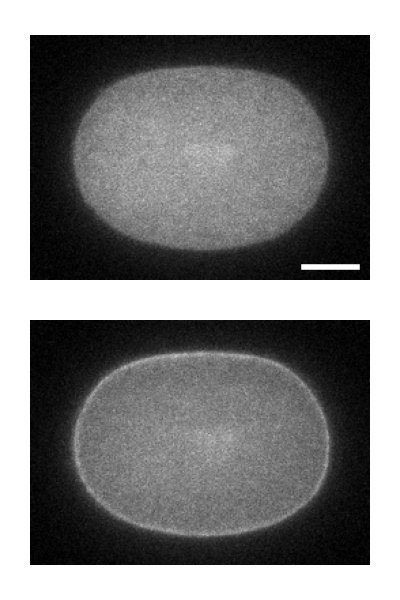

In [7]:
fig, ax = plt.subplots(2,1)
func(path_sv2061, ax[0], True, scale_bar=True)
func(path_sv2061, ax[1], False)
fig.set_size_inches(2, 3)
fig.tight_layout()
fig.savefig('Figs optogenetics/imgs_2x1.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


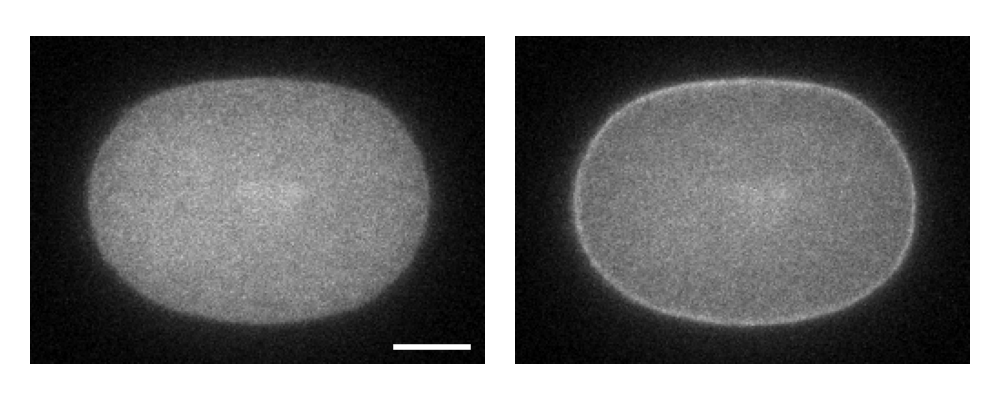

In [8]:
fig, ax = plt.subplots(1, 2)
func(path_sv2061, ax[0], True, scale_bar=True)
func(path_sv2061, ax[1], False)
fig.set_size_inches(5, 2)
fig.tight_layout()
fig.savefig('Figs optogenetics/imgs_1x2.png', dpi=600, transparent=True)

### Conversion factor

In [9]:
c = df[df.Line == 'sv2061'].apply(lambda x: ((x.cyt_pre - x.cyt_post) / (x.mem_post - x.mem_pre)) / 0.174, axis=1)
print(c)
print(np.mean(c))
print(np.std(c))

5     2.966082
6     3.090974
7     3.753188
8     3.313048
9     3.096970
10    2.894437
11    2.872653
12    2.859647
dtype: float64
3.1058749583500798
0.28317515019747347


### Concentrations

In [10]:
df_test = df[df.Line == 'sv2061']
df_ctrl = df[df.Line == 'nwg206']

<IPython.core.display.Javascript object>


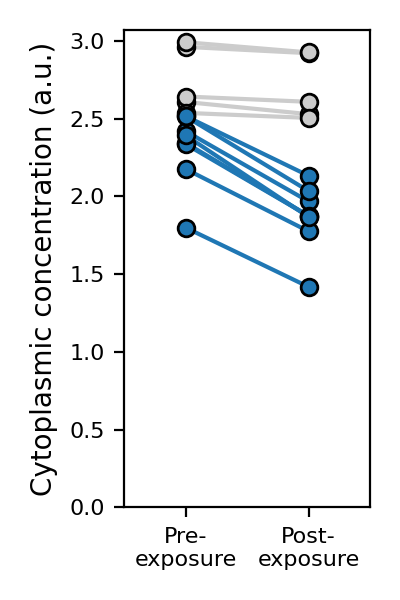

In [11]:
fig, ax = plt.subplots()
[ax.plot([1, 2], [x.cyt_pre, x.cyt_post], c='0.8', zorder=-100) for _, x in df_ctrl.iterrows()];
[ax.scatter([1, 2], [x.cyt_pre, x.cyt_post], c='0.8', linewidth=1, 
            edgecolors='k') for _, x in df_ctrl.iterrows()];
[ax.plot([1, 2], [x.cyt_pre, x.cyt_post], c='tab:blue', zorder=-100) for _, x in df_test.iterrows()];
[ax.scatter([1, 2], [x.cyt_pre, x.cyt_post], c='tab:blue', linewidth=1, 
            edgecolors='k') for _, x in df_test.iterrows()];
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-\nexposure', 'Post-\nexposure'], fontsize=8)
ax.set_xlim(0.5, 2.5)
ax.set_ylim(bottom=0)
ax.set_ylabel('Cytoplasmic concentration (a.u.)')
ax.tick_params(axis='y', labelsize=8)
fig.set_size_inches(2, 3)
fig.tight_layout()
# fig.savefig('Figs/cytoplasm.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


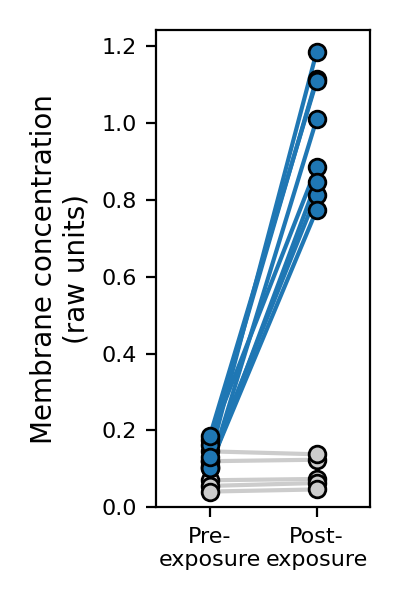

In [12]:
fig, ax = plt.subplots()
[ax.plot([1, 2], [x.mem_pre, x.mem_post], c='0.8', zorder=-100) for _, x in df_ctrl.iterrows()];
[ax.scatter([1, 2], [x.mem_pre, x.mem_post], c='0.8', linewidth=1, 
            edgecolors='k') for _, x in df_ctrl.iterrows()];
[ax.plot([1, 2], [x.mem_pre, x.mem_post], c='tab:blue', zorder=-100) for _, x in df_test.iterrows()];
[ax.scatter([1, 2], [x.mem_pre, x.mem_post], c='tab:blue', linewidth=1, 
            edgecolors='k') for _, x in df_test.iterrows()];
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-\nexposure', 'Post-\nexposure'], fontsize=8)
ax.set_xlim(0.5, 2.5)
ax.set_ylim(bottom=0)
ax.set_ylabel('Membrane concentration\n(raw units)')
ax.tick_params(axis='y', labelsize=8)
fig.set_size_inches(2, 3)
fig.tight_layout()
# fig.savefig('Figs/membrane.png', dpi=600, transparent=True)

### Pie

<IPython.core.display.Javascript object>


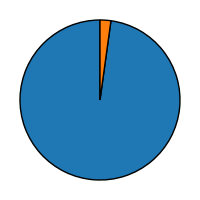

In [13]:
fig, ax = plt.subplots()
cyt = df[df.Line == 'sv2061'].cyt_pre.iloc[0]
mem = df[df.Line == 'sv2061'].mem_pre.iloc[0] * c.iloc[0] * 0.174
ax.pie([cyt, mem], startangle=90, colors=['tab:blue', 'tab:orange'], wedgeprops={'linewidth': 0.5, 'edgecolor': 'k'})
fig.set_size_inches(1, 1)
fig.subplots_adjust(wspace=-0.1, hspace=-0.1)
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
fig.savefig('Figs optogenetics/pie_pre.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


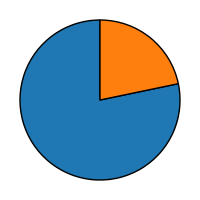

In [14]:
fig, ax = plt.subplots()
cyt = df[df.Line == 'sv2061'].cyt_post.iloc[0]
mem = df[df.Line == 'sv2061'].mem_post.iloc[0] * c.iloc[0] * 0.174
ax.pie([cyt, mem], startangle=90, colors=['tab:blue', 'tab:orange'], wedgeprops={'linewidth': 0.5, 'edgecolor': 'k'})
fig.set_size_inches(1, 1)
fig.subplots_adjust(wspace=-0.1, hspace=-0.1)
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
fig.savefig('Figs optogenetics/pie_post.png', dpi=600, transparent=True)